In [2]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [8]:
tips = sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
def mysum(d):
    s = 0
    for value in d:
        s += value
    if s > 2500:
        s = 2500
    
    return s

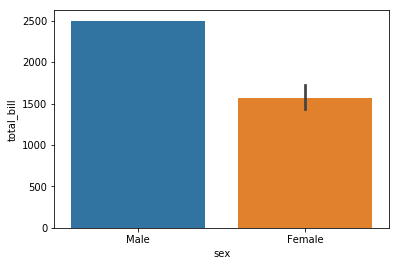

In [14]:
sns.barplot(x = "sex", y = "total_bill", data = tips, estimator = mysum)

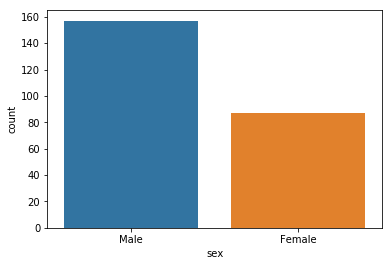

In [15]:
sns.countplot(x = 'sex', data = tips)

sex
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_bill, dtype: object

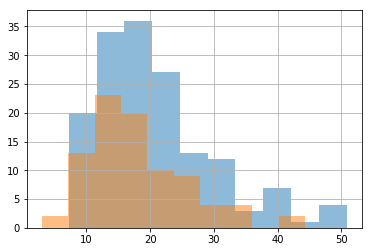

In [16]:
tips.groupby("sex")["total_bill"].hist(alpha = 0.5)

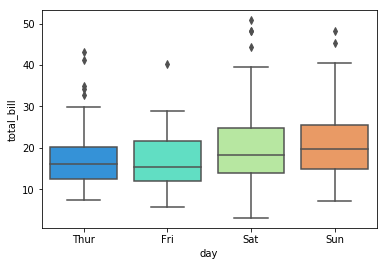

In [18]:
sns.boxplot(x = "day", y = "total_bill", data = tips, palette = "rainbow")

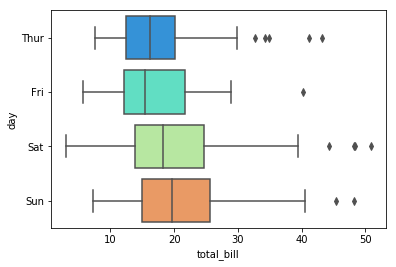

In [20]:
sns.boxplot(y = "day", x = "total_bill", data = tips, palette = "rainbow", orient = "h")

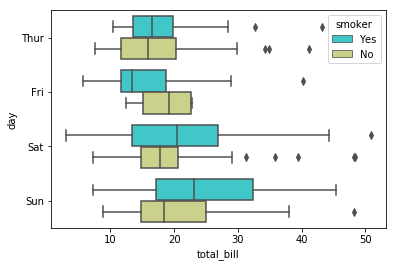

In [21]:
sns.boxplot(y = "day", x = "total_bill", data = tips, palette = "rainbow", orient = "h", hue = "smoker")

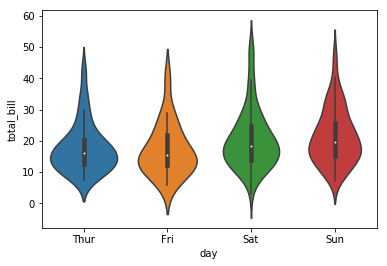

In [22]:
sns.violinplot(x = "day", y = "total_bill", data = tips, platte = "rainbow")

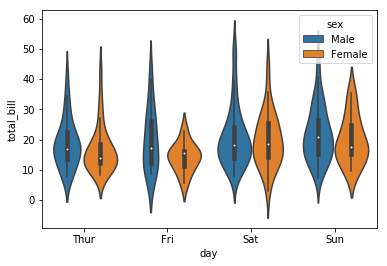

In [23]:
sns.violinplot(x = "day", y = "total_bill", data = tips, platte = "rainbow", hue = "sex")

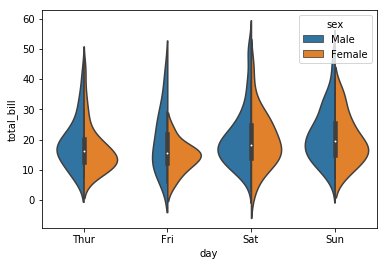

In [24]:
sns.violinplot(x = "day", y = "total_bill", data = tips, platte = "rainbow", hue = "sex", split = True)

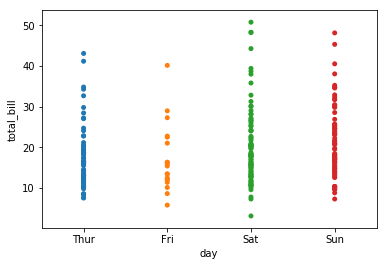

In [25]:
sns.stripplot(x = "day", y = "total_bill", data = tips)

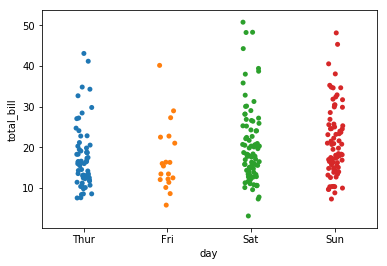

In [26]:
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True) # spray

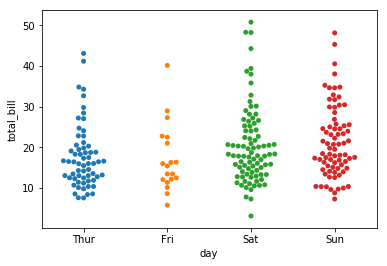

In [27]:
sns.swarmplot(x = "day", y = "total_bill", data = tips)

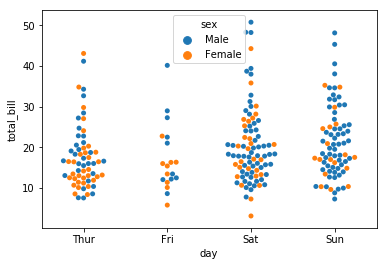

In [28]:
sns.swarmplot(x = "day", y = "total_bill", data = tips, hue = "sex")

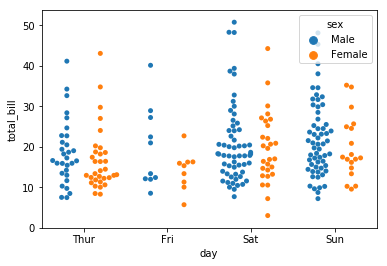

In [29]:
sns.swarmplot(x = "day", y = "total_bill", data = tips, hue = "sex", dodge = True)

In [30]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


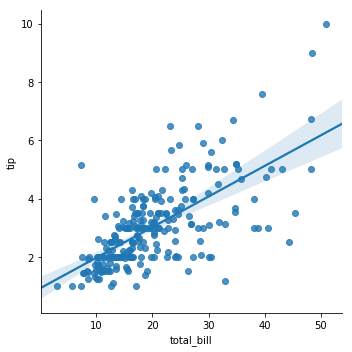

In [31]:
sns.lmplot(x = "total_bill", y = "tip", data = tips)

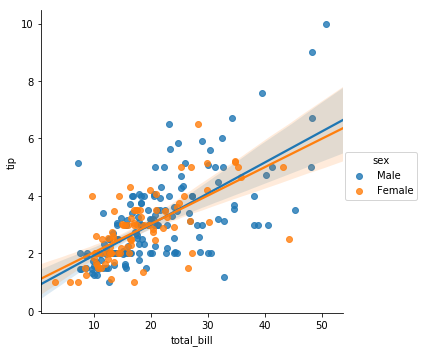

In [32]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex")

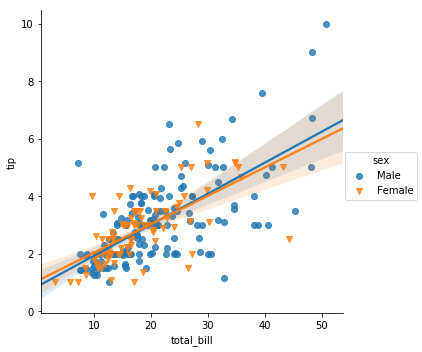

In [33]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", markers = ["o", "v"])

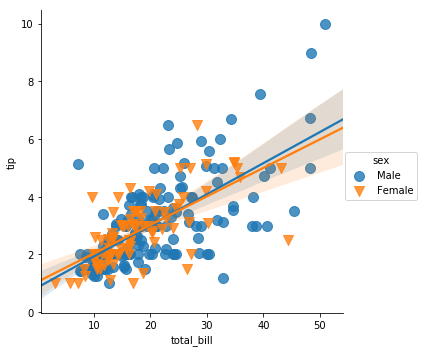

In [35]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", 
           markers = ["o", "v"], scatter_kws = {'s' : 100}) # s ~ size

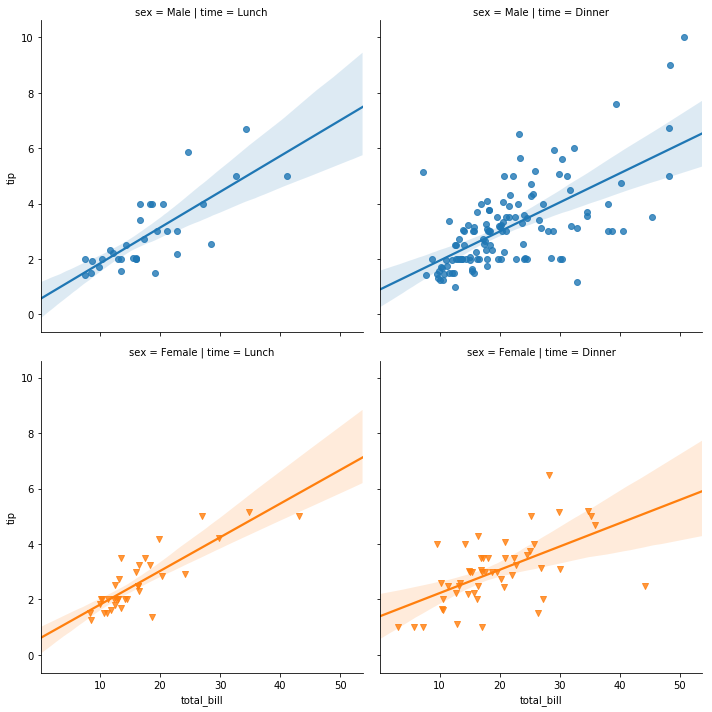

In [37]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", 
           markers = ["o", "v"], col = "time", row = "sex", size = 5)

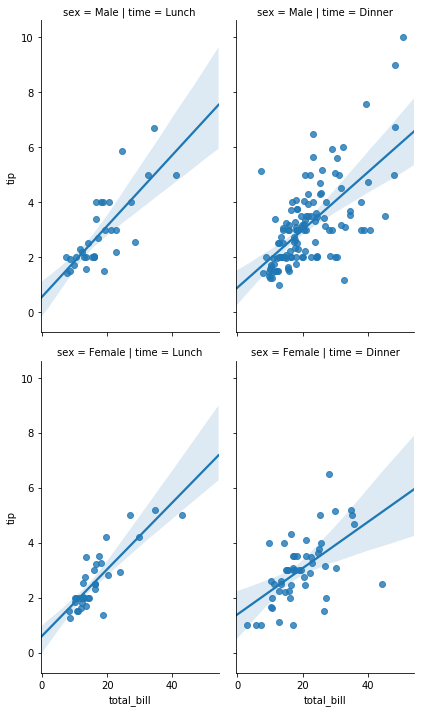

In [39]:
sns.lmplot(x = "total_bill", y = "tip", data = tips, col = "time", row = "sex", size = 5, aspect = 0.6)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


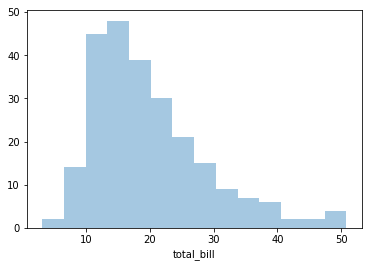

In [41]:
sns.distplot(tips["total_bill"], kde = False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


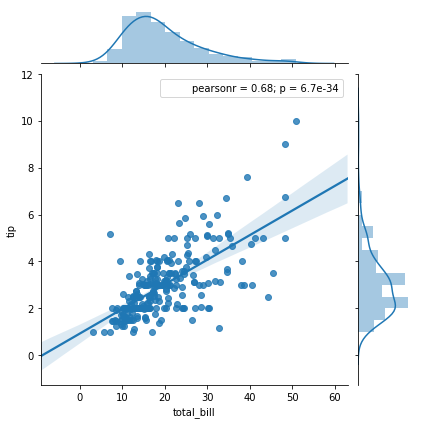

In [43]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


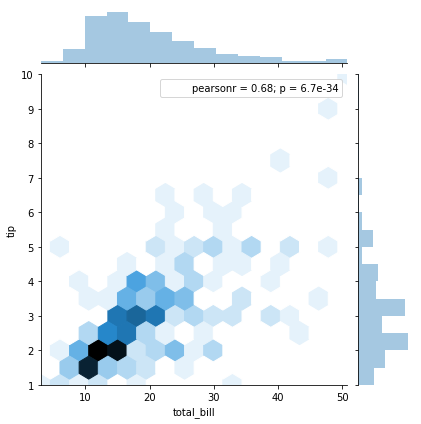

In [44]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


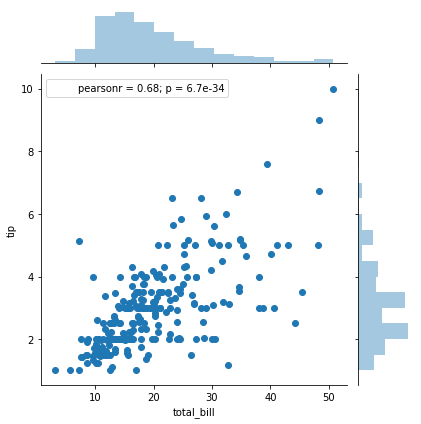

In [45]:
sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "scatter")

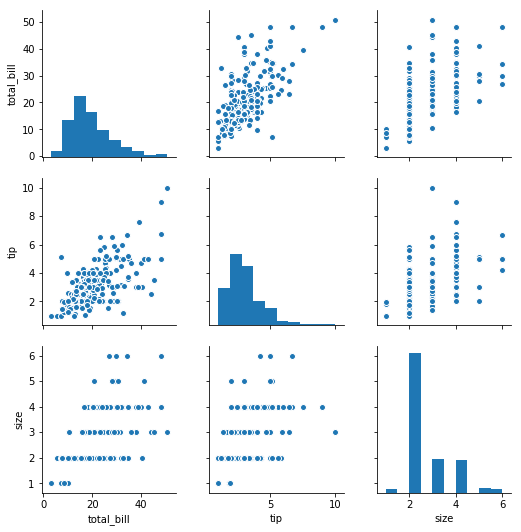

In [46]:
sns.pairplot(tips)

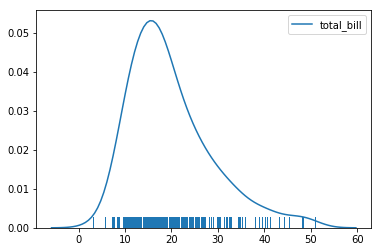

In [48]:
sns.kdeplot(tips["total_bill"])
sns.rugplot(tips["total_bill"])

In [51]:
from scipy import stats
import matplotlib.pyplot as plt

(0, 1)

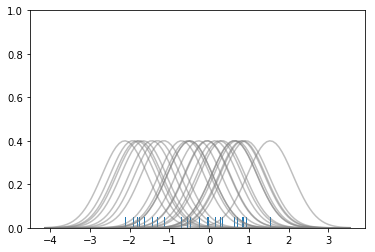

In [52]:
dataset = np.random.randn(25)
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** .2

kernel_list = list()
for point in dataset:
    kernel = stats.norm(point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max() * 0.4
    plt.plot(x_axis, kernel, color = "grey", alpha = 0.5)
    
plt.ylim(0, 1)

([], <a list of 0 Text yticklabel objects>)

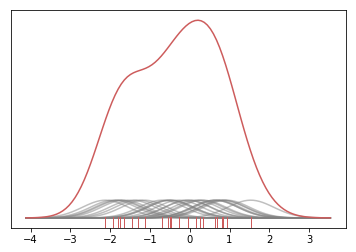

In [54]:
sum_of_kde = np.sum(kernel_list, axis = 0)

for kernel in kernel_list:
    plt.plot(x_axis, kernel, color = "grey", alpha = 0.5)
    
fig = plt.plot(x_axis, sum_of_kde, color = "indianred")

sns.rugplot(dataset, c = "indianred")

plt.yticks([])